### Exercice 1 ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from traffic_env import TrafficEnvironment


🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [9 4 2 2] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [11  4  2  1]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [13  5  0  1]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [8 2 0 2]
  🎯 Reward (Cars Passed): 6
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [10  3  0  2]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [12  4  0  2]
  🎯 Reward (Cars Passed): 2
--

### Exercice 2: Implémentation de Q-Learning ###


In [ ]:
def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    q_table = np.zeros((10, 10, 10, 10, 2))  # États: (N, S, E, W), Actions: (0, 1)
    rewards = []

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))  
        total_reward = 0

        for _ in range(100):
            action = np.random.choice([0, 1]) if random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9)) 

            best_next_action = np.argmax(q_table[next_state])
            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon *= decay

    return q_table, rewards


### Exercice 3: Implémentation de SARSA ###


In [ ]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    q_table = np.zeros((10, 10, 10, 10, 2))
    rewards = []

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))  
        action = np.random.choice([0, 1]) if random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
        total_reward = 0

        for _ in range(100):
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))  
            next_action = np.random.choice([0, 1]) if random.uniform(0, 1) < epsilon else np.argmax(q_table[next_state])

            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (next_action,)] - q_table[state + (action,)])

            state, action = next_state, next_action
            total_reward += reward

        rewards.append(total_reward)
        epsilon *= decay

    return q_table, rewards


### Exercice 4: Analyse et Visualisation des Résultats ###

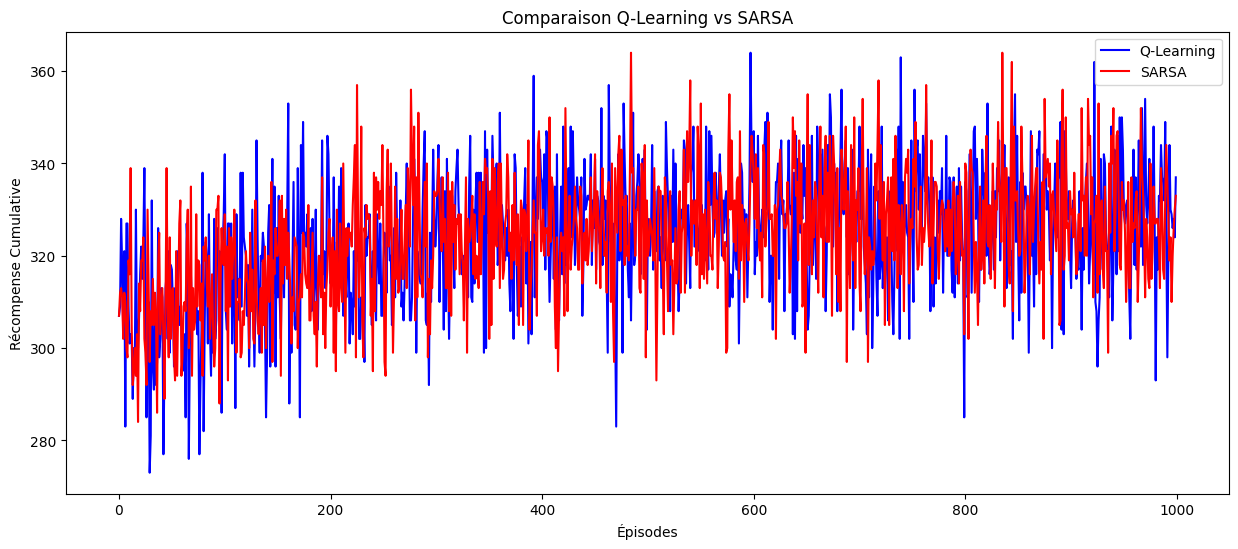

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Augmenter la largeur à 15 et garder une hauteur raisonnable
plt.plot(q_learning_rewards, label="Q-Learning", color='b')
plt.plot(sarsa_rewards, label="SARSA", color='r')
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.title("Comparaison Q-Learning vs SARSA")
plt.show()
